<a href="https://colab.research.google.com/github/glebmikha/ab-testing-course/blob/main/07_misc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мой Telegram-канал: https://t.me/mikhaylovgleb

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Modeled p-value vs Actual p-value

In [ ]:
n = 10000
result = []
for i in range(n):
  np.random.seed(i)
  result.append(np.random.binomial(10,0.5))

In [ ]:
df = pd.DataFrame(result)

In [ ]:
df['dev'] = abs(df[0] - 5)

In [ ]:
df

,0,dev
0,5,0
1,5,0
2,5,0
3,5,0
4,8,3
...,...,...
9995,5,0
9996,6,1
9997,2,3
9998,4,1


In [ ]:
devs = [0,1,2,3,4,5]

In [ ]:
result = []
for dev in devs:
  result.append((dev,(df['dev'] >= dev).mean()))

In [ ]:
pvals = pd.DataFrame(result,columns=['heads','p-values'])

In [ ]:
pvals

,heads,p-values
0,0,1.0000
1,1,0.7573
2,2,0.3515
3,3,0.1124
4,4,0.0229
5,5,0.0009


In [ ]:
pvals['pval_ztest'] = pvals['heads'].apply(lambda x: proportions_ztest(5-x,10,0.5,alternative='two-sided')[1])

In [ ]:
pvals

,heads,p-values,pval_ztest
0,0,1.0000,1.000000
1,1,0.7573,0.518605
2,2,0.3515,0.167546
3,3,0.1124,0.017706
4,4,0.0229,0.000025
5,5,0.0009,0.000000


<Axes: xlabel='heads'>

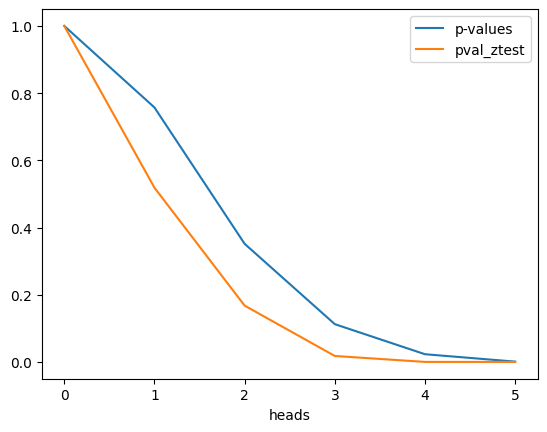

In [ ]:
pvals.set_index('heads').plot()

# Desired FPR vs actual FPR

## Sample size 10

In [ ]:
df

,0,dev
0,5,0
1,5,0
2,5,0
3,5,0
4,8,3
...,...,...
9995,5,0
9996,6,1
9997,2,3
9998,4,1


In [ ]:
df[0].apply(lambda x: proportions_ztest(x,10,0.5,alternative='two-sided')[1])

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       0.017706
          ...   
9995    1.000000
9996    0.518605
9997    0.017706
9998    0.518605
9999    0.518605
Name: 0, Length: 10000, dtype: float64

In [ ]:
df[0].apply(lambda x: proportions_ztest(x,10,0.5,alternative='two-sided')[1]) < 0.05

0       False
1       False
2       False
3       False
4        True
        ...  
9995    False
9996    False
9997     True
9998    False
9999    False
Name: 0, Length: 10000, dtype: bool

In [ ]:
(df[0].apply(lambda x: proportions_ztest(x,10,0.5,alternative='two-sided')[1]) < 0.05).mean()

0.1124

## Sample size 20

In [ ]:
n = 10000
result = []
for i in range(n):
  np.random.seed(i)
  result.append(np.random.binomial(20,0.5))

In [ ]:
df = pd.DataFrame(result)

In [ ]:
(df[0].apply(lambda x: proportions_ztest(x,20,0.5,alternative='two-sided')[1]) < 0.05).mean()

0.0447

Мой Telegram-канал: https://t.me/mikhaylovgleb